In [3]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix,roc_curve,mean_squared_error
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [4]:
df = pd.read_csv('reduced_data.csv')

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,target
0,-631.390294,39.255685,-620.139680,-270.620429,307.098824,59.920544,1719.312936,-41.086640,546.941169,-1658.672715,...,-694.488240,1571.382926,609.688808,-247.674982,320.251642,-58.447687,149.580986,-1498.941745,477.388969,0
1,-764.799156,-1004.216997,-699.383441,-1554.146869,1126.676147,388.769586,381.068924,122.930325,651.841713,1242.658607,...,694.358089,-353.065671,177.053114,-556.389878,484.044461,24.927065,-991.467922,-180.180590,-75.540385,0
2,6867.868689,1524.034359,2442.736203,-1778.163163,-496.131326,1479.170916,1368.910177,-427.354694,553.178881,65.814942,...,1111.141965,-416.964075,-331.650277,-125.335034,1071.566103,-344.122667,1117.343368,-452.730915,-258.121644,0
3,-2472.023169,66.278793,-4267.073738,2184.658086,-4432.064912,3570.616254,2232.464484,-930.455152,-1625.098847,1356.783740,...,-1595.771428,30.923941,-370.693925,580.601526,71.970207,-891.736838,1164.998677,-3180.866310,-579.514112,0
4,-4507.703394,451.850992,-590.995235,-1940.872441,580.176537,-3247.605387,1281.180148,-398.788845,-1329.809394,-1346.088612,...,-955.893436,-711.951874,1329.211073,44.155600,-1886.432104,2035.655774,903.552306,1325.785968,-132.881297,0


In [6]:
df.var()

0         3.172374e+07
1         4.341340e+06
2         3.851165e+06
3         2.746983e+06
4         2.692174e+06
5         2.408015e+06
6         2.314635e+06
7         2.259528e+06
8         2.057578e+06
9         2.035959e+06
10        1.949825e+06
11        1.915537e+06
12        1.724782e+06
13        1.708674e+06
14        1.616540e+06
15        1.590551e+06
16        1.524726e+06
17        1.429989e+06
18        1.398365e+06
19        1.354297e+06
20        1.320534e+06
21        1.305377e+06
22        1.280118e+06
23        1.231386e+06
24        1.190348e+06
25        1.174088e+06
26        1.157467e+06
27        1.108806e+06
28        1.069089e+06
29        1.043461e+06
30        1.018032e+06
31        9.961619e+05
32        9.552417e+05
33        9.438282e+05
34        9.278828e+05
35        9.118222e+05
36        8.834994e+05
37        8.311498e+05
38        8.193325e+05
39        8.097954e+05
40        7.923277e+05
41        7.579853e+05
42        7.136066e+05
target    2

In [7]:
df.isna().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
target    0
dtype: int64

In [8]:
x= df.drop(['target'],axis=1)
y= df['target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=42)

scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

Text(0, 0.5, 'MSE')

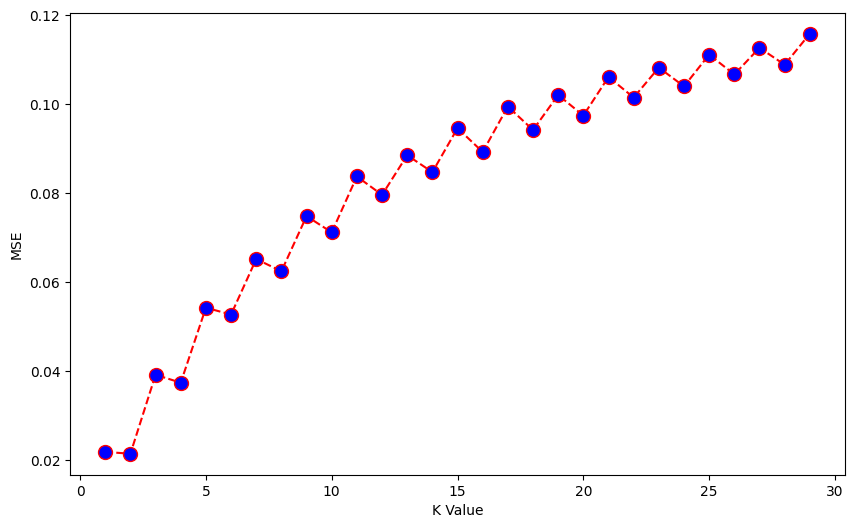

In [10]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)   
    pred= knn.predict(X_test)
    error.append(mean_squared_error(y_test,pred))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('K Value')
plt.ylabel('MSE')

In [11]:
knn= KNeighborsClassifier(n_neighbors=2)  
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=2)

In [12]:
knn.score(X_test,y_test)

0.9785940160544879

In [13]:
knn.score(X_train,y_train)

1.0

Text(0, 0.5, 'Accuary')

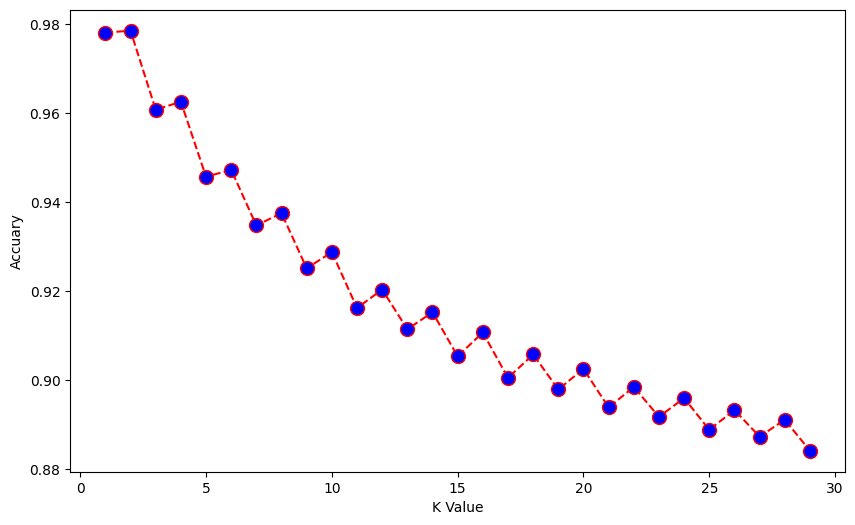

In [14]:
scores = []
# Calculating accuary for K values between 1 and 30
for i in range(1, 30):
    knn2= KNeighborsClassifier(n_neighbors=i)  
    knn2.fit(X_train, y_train) 
    score = knn2.score(X_test,y_test)
    scores.append((score))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('K Value')
plt.ylabel('Accuary')

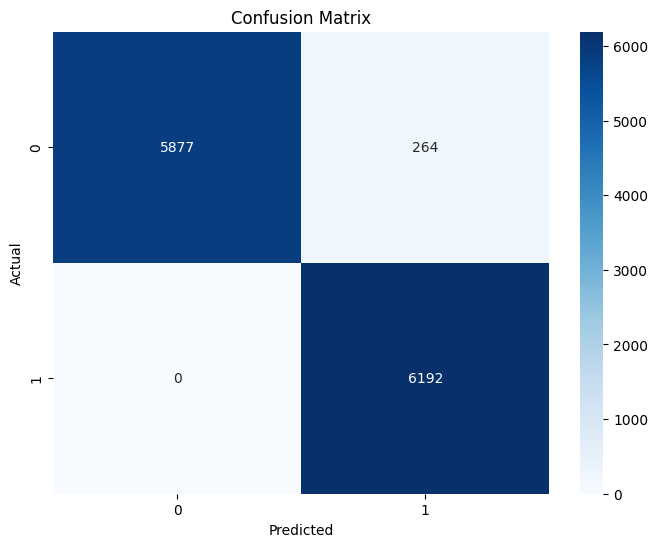

In [15]:


# Calculate and display the confusion matrix
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:

# assuming y_test and y_pred are the true and predicted labels, respectively
# calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# calculate the precision
precision = precision_score(y_test, y_pred)

# calculate the sensitivity/recall
sensitivity = recall_score(y_test, y_pred)

# calculate the specificity
specificity = tn / (tn + fp)

# calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred)

# print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity/Recall:", sensitivity)
print("Specificity:", specificity)
print("AUC Score:",auc_score)
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Accuracy: 0.9785940160544879
Precision: 0.9591078066914498
Sensitivity/Recall: 1.0
Specificity: 0.9570102589154861
AUC Score: 0.978505129457743
Mean Squared Error: 0.02140598394551204


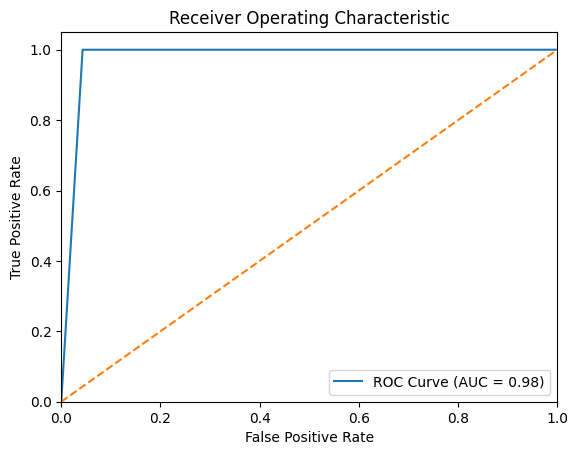

In [17]:
# Make predictions on the test set
y_pred = knn.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

[0.9216298398540441, 0.9317251165619298, 0.937501408637556, 0.9404409166118475, 0.9380277823566476, 0.9425079808803989, 0.9397513883465894, 0.9461556750411759, 0.9479380467706294]


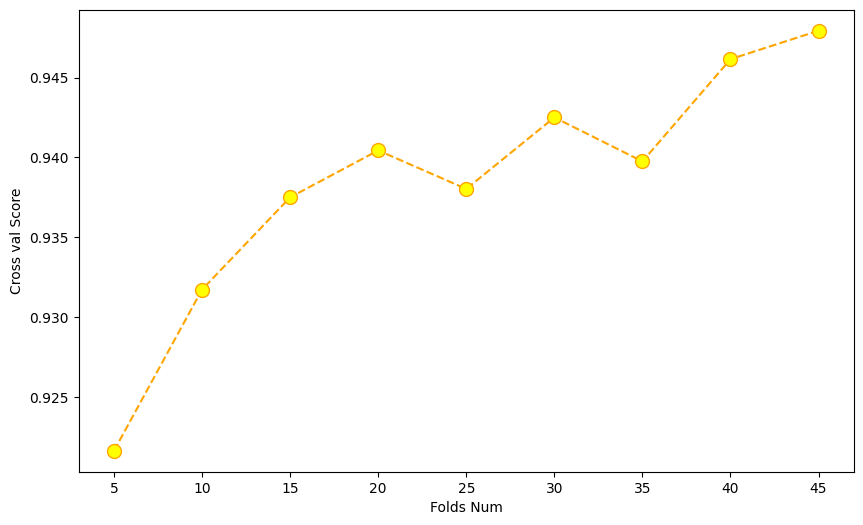

In [18]:


def k_folds_cross_val(folds_num,classifier,X, Y):

    sk_folds = StratifiedKFold(n_splits = folds_num)
    scores = cross_val_score(classifier, X ,Y, cv = sk_folds)

    # print("Cross Validation Scores: ", scores)
    # print("Average CV Score: ", scores.mean())
    # print("Number of CV Scores used in Average: ", len(scores))

    return scores

def LeaveOneOut_cross_val(classifier,X, Y):
    
    loo = LeaveOneOut()

    scores = cross_val_score(classifier,X, Y, cv = loo)

    # print("Cross Validation Scores: ", scores)
    # print("Average CV Score: ", scores.mean())
    # print("Number of CV Scores used in Average: ", len(scores))

    return scores

def cross_val(classifier,X, Y):
    
    scores=[]
    for folds_num in range (5,50,5):
      K_scores= k_folds_cross_val(folds_num,classifier,X, Y)
      scores.append(K_scores.mean())
    print(scores)
    plt.figure(figsize=(10, 6))
    plt.plot(range (5,50,5), scores, color='orange', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=10)
    plt.xlabel('Folds Num')
    plt.ylabel('Cross val Score')

    # LeaveOneOut_scores=LeaveOneOut_cross_val(classifier,X, Y)
    # plt.figure(figsize=(10, 6))
    # plt.plot(range(len(LeaveOneOut_scores)), LeaveOneOut_scores, color='orange', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=10)

cross_val(knn,x, y )

In [19]:

def PlotlearningCurve(classifier,x,y):
    #  Learning Curve and Scores
    train_sizes, train_scores, test_scores = learning_curve(classifier,x,y, cv=5, scoring='accuracy'
                                                                , n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    # Ploting the Learning Curve
    plt.subplots(1, figsize=(10,10))
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

PlotlearningCurve(knn,x,y)